In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Import Data

In [ ]:
gender_df = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/gender_data.csv')
gender_df.head()

,Borough,AgeGroup,Male,Female,GenderRatio
0,Manhattan,Under 5 years,37830.0,36161.0,1.05
1,Manhattan,5 to 9 years,31390.0,29666.0,1.06
2,Manhattan,10 to 14 years,32515.0,32601.0,1.00
3,Manhattan,15 to 19 years,32832.0,37072.0,0.89
4,Manhattan,20 to 24 years,48731.0,59439.0,0.82


In [ ]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Borough      90 non-null     object 
 1   AgeGroup     90 non-null     object 
 2   Male         90 non-null     float64
 3   Female       90 non-null     float64
 4   GenderRatio  90 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.6+ KB


In [ ]:
gender_df['Population'] = gender_df['Male'] + gender_df['Female']

In [ ]:
gender_df.columns

Index(['Borough', 'AgeGroup', 'Male', 'Female', 'GenderRatio', 'Population'], dtype='object')

In [ ]:
# Filter the DataFrame for rows where the Borough is Brooklyn
gender_brooklyn_df = gender_df[gender_df['Borough'] == 'Brooklyn']

In [ ]:
race_df = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/brooklyn_race.csv')
race_df.head()

,Race,Population
0,Hispanic or Latino,516426.0
1,White alone,968427.0
2,Black or African American alone,729696.0
3,American Indian and Alaska Native ...,3964.0
4,Asian alone,370776.0


In [ ]:
food_df = pd.read_csv('/content/gdrive/MyDrive/Spring 2024/Capstone/Data/FoodAccessAtlas.csv')
food_df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [ ]:
#converting all columns to lowercase
food_df.columns = map(str.lower, food_df.columns)

#dropping all states except new york
food_df = food_df.drop(food_df[food_df['state'] != 'New York'].index)

In [ ]:
#selecting only Brooklyn
bk_df = food_df[food_df['county'] == 'Kings County']
bk_df.head()

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,...,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
43956,36047000100,New York,Kings County,1,4338,2227,0,424.0,9.77,0,...,843.0,3396.0,427.0,330.0,0.0,15.0,170.0,347.0,1417.0,126.0
43957,36047000200,New York,Kings County,1,1470,360,0,39.0,2.65,0,...,70.0,530.0,103.0,49.0,0.0,16.0,772.0,1277.0,265.0,138.0
43958,36047000301,New York,Kings County,1,4259,2020,0,488.0,11.46,0,...,688.0,3658.0,180.0,241.0,0.0,6.0,174.0,246.0,1220.0,24.0
43959,36047000501,New York,Kings County,1,4247,1879,0,1082.0,25.48,0,...,553.0,3266.0,292.0,432.0,1.0,22.0,234.0,312.0,1261.0,162.0
43960,36047000502,New York,Kings County,1,2512,1509,0,41.0,1.63,0,...,357.0,2086.0,113.0,186.0,0.0,4.0,123.0,162.0,1165.0,31.0


# EDA

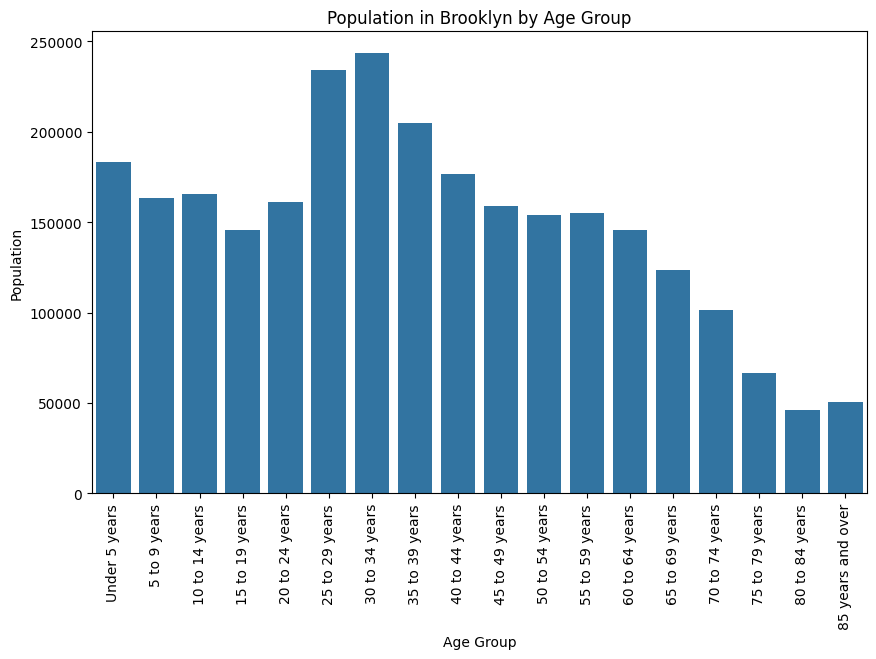

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Population', data=gender_brooklyn_df)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Population')
plt.title('Population in Brooklyn by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

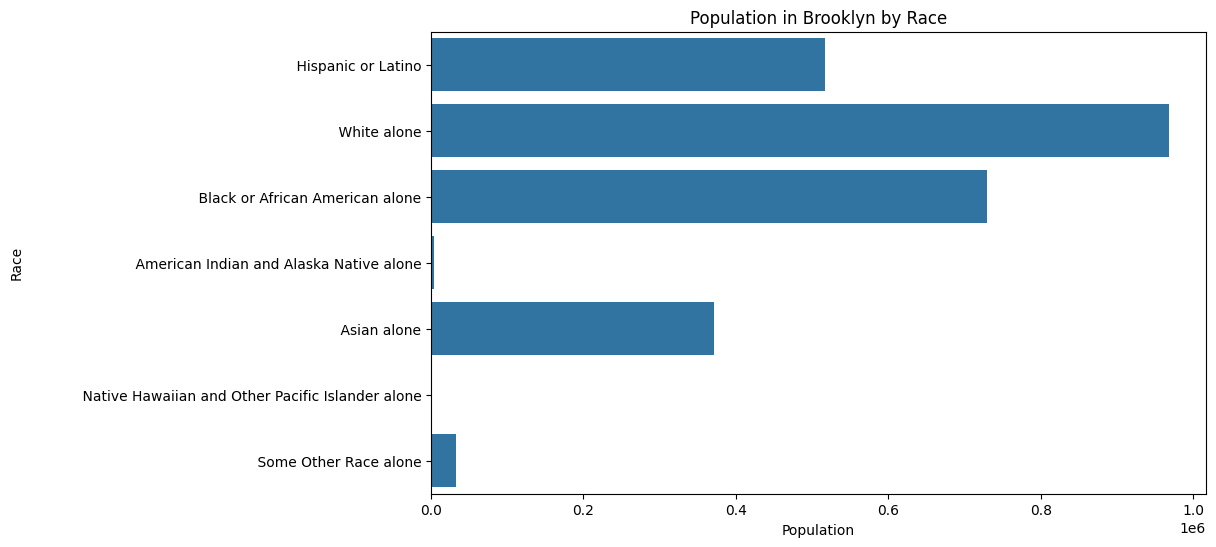

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Population', y='Race', data=race_df)

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Race')
plt.title('Population in Brooklyn by Race')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
selected_cols=['state','county','tractlowi', 'tractkids', 'tractseniors', 'tractwhite', 'tractblack', 'tractasian', 'tracthispanic', 'tracthunv', 'tractsnap', 'povertyrate', 'medianfamilyincome']
key_indicators=bk_df[selected_cols]
key_indicators.head()

,state,county,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tracthispanic,tracthunv,tractsnap,povertyrate,medianfamilyincome
43956,New York,Kings County,837.0,522.0,843.0,3396.0,427.0,330.0,347.0,1417.0,126.0,11.1,141964.0
43957,New York,Kings County,695.0,455.0,70.0,530.0,103.0,49.0,1277.0,265.0,138.0,32.4,41250.0
43958,New York,Kings County,659.0,619.0,688.0,3658.0,180.0,241.0,246.0,1220.0,24.0,11.5,243043.0
43959,New York,Kings County,361.0,395.0,553.0,3266.0,292.0,432.0,312.0,1261.0,162.0,5.4,229125.0
43960,New York,Kings County,262.0,254.0,357.0,2086.0,113.0,186.0,162.0,1165.0,31.0,4.8,194159.0


array([[<Axes: title={'center': 'tractlowi'}>,
        <Axes: title={'center': 'tractkids'}>,
        <Axes: title={'center': 'tractseniors'}>],
       [<Axes: title={'center': 'tractwhite'}>,
        <Axes: title={'center': 'tractblack'}>,
        <Axes: title={'center': 'tractasian'}>],
       [<Axes: title={'center': 'tracthispanic'}>,
        <Axes: title={'center': 'tracthunv'}>,
        <Axes: title={'center': 'tractsnap'}>],
       [<Axes: title={'center': 'povertyrate'}>,
        <Axes: title={'center': 'medianfamilyincome'}>, <Axes: >]],
      dtype=object)

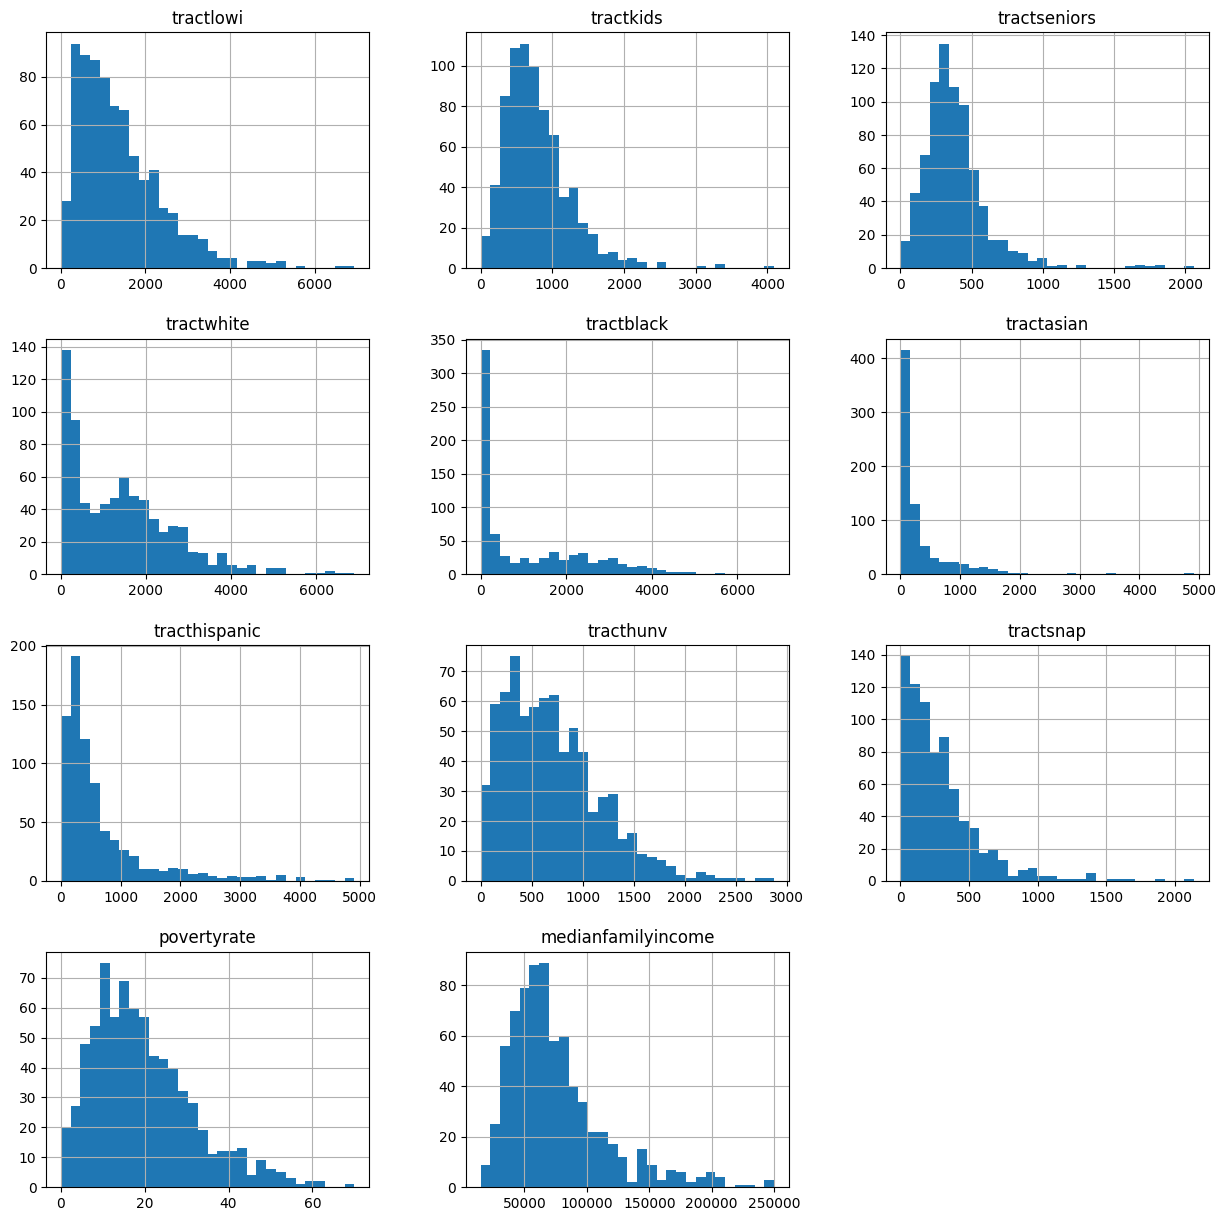

In [ ]:
key_indicators.hist(bins=30, figsize=(15, 15))